for this project we will make a student performance predictor.
since the data has 5 feature and a single target a simple model like linear regresion will do.
for testing purposes we will use GridSearchCV to see what are the most optimal hyper pramaters.

the dependencies for this projects are
1.sklearn
2.matplotlib "for data visualization"
3.seaborn "same reason"
4.pandas
5.joblib "to save and load the model"
6.streamlit "as an interface"

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('Student_Performance.csv')

In [ ]:
dataset.count()

Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64

In [8]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [10]:
dataset.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
def Yes_No_encoding(data):
    return 1 if data == 'Yes' else 0

dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].apply(Yes_No_encoding)
dataset = pd.DataFrame(dataset)

In [12]:
#Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index

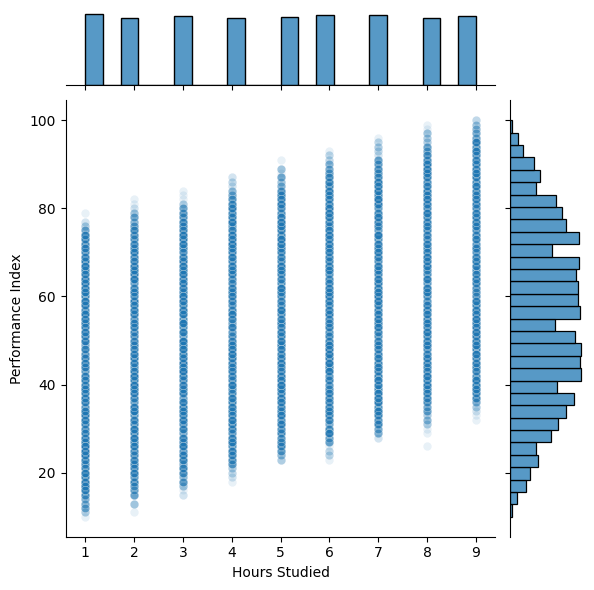

In [13]:
sns.jointplot(x='Hours Studied' , y='Performance Index', data=dataset,alpha=0.1)

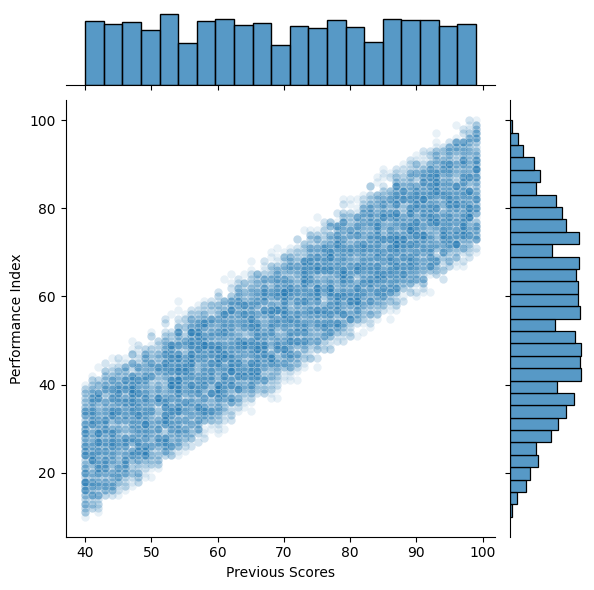

In [19]:
sns.jointplot(x='Previous Scores' , y='Performance Index', data=dataset,alpha=0.1)

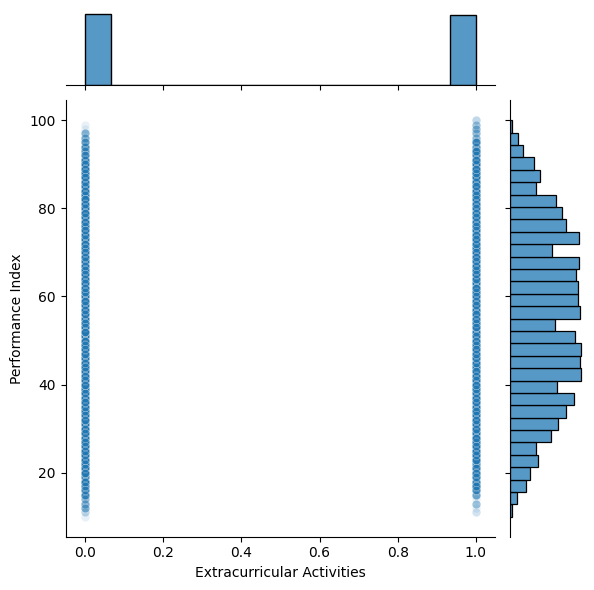

In [14]:
sns.jointplot(x='Extracurricular Activities' , y='Performance Index', data=dataset,alpha=0.1)

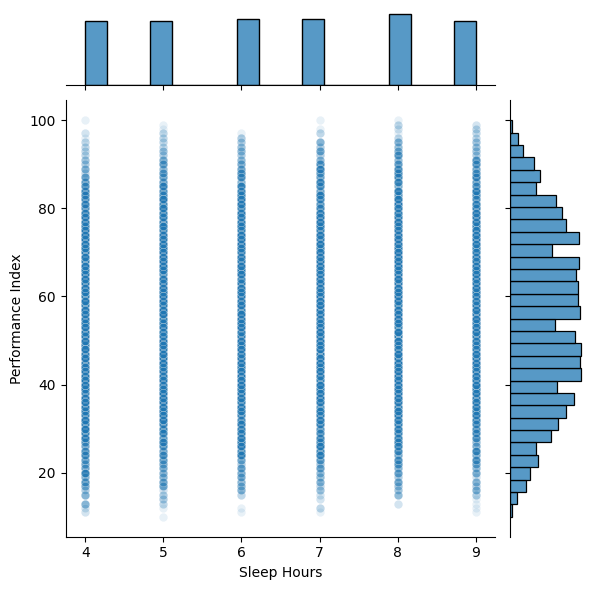

In [15]:
sns.jointplot(x='Sleep Hours' , y='Performance Index', data=dataset,alpha=0.1)

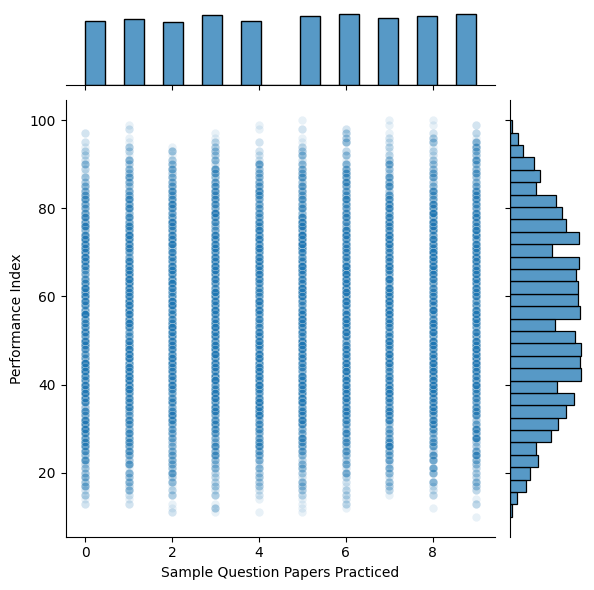

In [16]:
sns.jointplot(x='Sample Question Papers Practiced' , y='Performance Index', data=dataset,alpha=0.1)

we can see that the data are very dispersed so concerns about not being able to predict are rasied
though we can see that previous scores are clearly expressing a great deal of correlation.
ML leverage this kind of feature in datasets

In [17]:

scaler = StandardScaler()
normalized_data = scaler.fit_transform(dataset)

X, Y = normalized_data[:, :-1], normalized_data[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import GridSearchCV as CV
import joblib
model = LR()
param_grid = {'fit_intercept':[True,False],'copy_X':[True, False], 'positive':[True,False]}

CV_model = CV(model, param_grid, cv=5)
CV_model.fit(x_train, y_train)

print('best parameters: ' , CV_model.best_params_,'\n' ,
      'best estimator: ',CV_model.best_estimator_,'\n',
      'parameters: ',CV_model.best_estimator_.coef_,'\n',
      'best score',CV_model.best_score_,'\n',)

joblib.dump(CV_model.best_estimator_, 'model.pkl')



best parameters:  {'copy_X': True, 'fit_intercept': False, 'positive': True} 
 best estimator:  LinearRegression(fit_intercept=False, positive=True) 
 parameters:  [0.3843578  0.91972988 0.01731362 0.04208878 0.02802277] 
 best score 0.9888652480049819 



['model.pkl']

we can see from the previous cell output that the model achieved 98% accuracy and the decider unsuprisingly was the Previous Scores column